# Content

This data set contains details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer
* Target: kolom Exited --> Binary flag 1 if the customer closed account with bank and 0 if the customer is retaine

In [726]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statistics as st
import scipy.stats

import statsmodels.api as sm
from statsmodels.api import OLS
from statsmodels.stats.outliers_influence import variance_inflation_factor

import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import KBinsDiscretizer

from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV, train_test_split, StratifiedKFold
from sklearn.linear_model import LogisticRegression, Ridge

from sklearn.metrics import mean_squared_error
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve, roc_auc_score, precision_recall_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report, f1_score, recall_score, precision_score

from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree, DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss
os = SMOTE(random_state=0)

from sklearn.feature_selection import SelectPercentile

import warnings

# Pertanyaan 1
* Jalankan Exploratory Data Analysis untuk memahami ciri-ciri dan perilaku nasabah yang menutup akunnya. Berikan penjelasan tentang insight yang Anda temukan dari hasil Exploratory Data Analysis ke manajemen bank!

# EDA

In [727]:
df = pd.read_csv('Churn_Modelling.csv')
df.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         79084.10       0

In [728]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [729]:
df.shape

(10000, 14)

In [730]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [731]:
df.describe(include='all')

RowNumber    CustomerId Surname   CreditScore Geography Gender  \
count   10000.00000  1.000000e+04   10000  10000.000000     10000  10000   
unique          NaN           NaN    2932           NaN         3      2   
top             NaN           NaN   Smith           NaN    France   Male   
freq            NaN           NaN      32           NaN      5014   5457   
mean     5000.50000  1.569094e+07     NaN    650.528800       NaN    NaN   
std      2886.89568  7.193619e+04     NaN     96.653299       NaN    NaN   
min         1.00000  1.556570e+07     NaN    350.000000       NaN    NaN   
25%      2500.75000  1.562853e+07     NaN    584.000000       NaN    NaN   
50%      5000.50000  1.569074e+07     NaN    652.000000       NaN    NaN   
75%      7500.25000  1.575323e+07     NaN    718.000000       NaN    NaN   
max     10000.00000  1.581569e+07     NaN    850.000000       NaN    NaN   

                 Age        Tenure        Balance  NumOfProducts    HasCrCard  \
count   10000.000000  10000.000000   10000.000000   10000.000000  10000.00000   
unique           NaN           NaN            NaN            NaN          NaN   
top              NaN           NaN            NaN            NaN          NaN   
freq             NaN           NaN            NaN            NaN          NaN   
mean       38.921800      5.012800   76485.889288       1.530200      0.70550   
std        10.487806      2.892174   62397.405202       0.581654      0.45584   
min        18.000000      0.000000       0.000000       1.000000      0.00000   
25%        32.000000      3.000000       0.000000       1.000000      0.00000   
50%        37.000000      5.000000   97198.540000       1.000000      1.00000   
75%        44.000000      7.000000  127644.240000       2.000000      1.00000   
max        92.000000     10.000000  250898.090000       4.000000      1.00000   

        IsActiveMember  EstimatedSalary        Exited  
count     10000.000000     10000.000000  10000.000000  
unique             NaN              NaN           NaN  
top                NaN              NaN           NaN  
freq               NaN              NaN           NaN  
mean          0.515100    100090.239881      0.203700  
std           0.499797     57510.492818      0.402769  
min           0.000000        11.580000      0.000000  
25%           0.000000     51002.110000      0.000000  
50%           1.000000    100193.915000      0.000000  
75%           1.000000    149388.247500      0.000000  
max           1.000000    199992.480000      1.000000

In [732]:
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

# Comment
* Disini kita ingin membuat model yg dapat memprediksi faktor2 yg mempengaruhi seseorang untuk bertahan (tetap membuka rekening) pada suatu bank --> Target
* Terdapat 10000 dataert (row) dengan 14 kolom
* Kita dapat lihat pengguna utama bank nya berasal dari negara France
* Selain itu, umur rata2 pengguna adalah 39 tahun
* Kita juga dapat lihat bahwa rata2 pengguna sudah menggunakan jasa bank selama 5 tahun
* Kemudian, balance rata2 dari pengguna adalah sebesar 76K, namun terddapat juga pengguna yg memiliki balance sebesar 250K
* Pengguna juga menggunakan 1 jasa dari bank. Namun, terdapat pula nasabah yg menggunakan hingga 4 jenis layanan yg disediakan oleh bank
* Rata2 nasabah tidak memiliki kredit card
* Pendapatan rata2 nasabah adalah sebesar 100k
* kita juga bisa lihat bahwa data tidak memiliki NULL value. YEAHHHH!

### Tidak semua kolom dapat kita gunakan karena sifatnya yg bukan sebagai predictor. contoh kolom yg tidak diperlukan antara lain kolom: RowNumber, CustomerId, Surname
### dari fungsi describe, kita dapat melihat secara sekilas outlier pada kolom: Age, Balance, NumOfProducts. Hal ini dapat kita lihat dengan membandingkan nilai MAX datasetnya nya dengan value 75% datasetnya

### Next kita akan lihat persebaran data targetnya terhadap variabel Age

### 1) Credit Score & Age

Text(0, 0.5, 'Age')

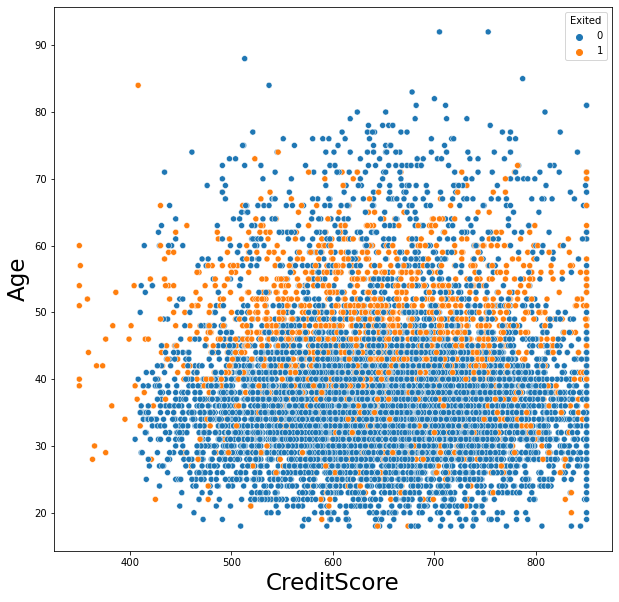

In [733]:
plt.figure(figsize=(10,10))
sns.scatterplot(x= 'CreditScore', y= 'Age', data=df, hue='Exited')
plt.xlabel('CreditScore', fontsize=23)
plt.ylabel('Age', fontsize=23)

### 2) EstimatedSalary & Age

Text(0, 0.5, 'Age')

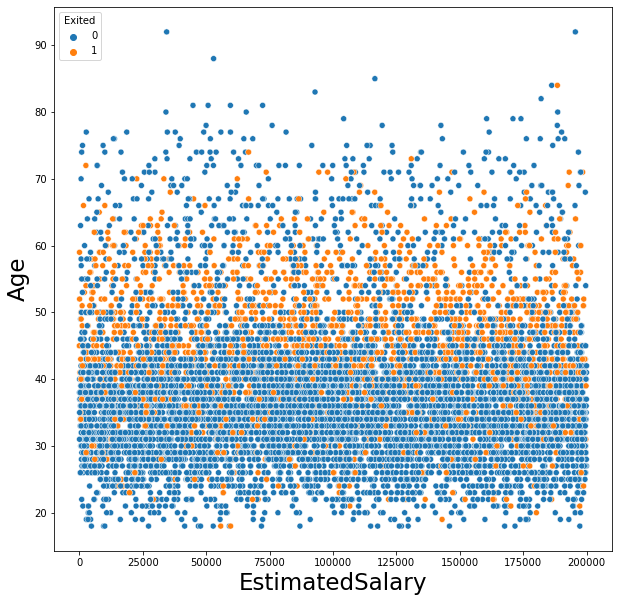

In [734]:
plt.figure(figsize=(10,10))
sns.scatterplot(x= 'EstimatedSalary', y= 'Age', data=df, hue='Exited')
plt.xlabel('EstimatedSalary', fontsize=23)
plt.ylabel('Age', fontsize=23)

### 3) Balance & Age

Text(0, 0.5, 'Age')

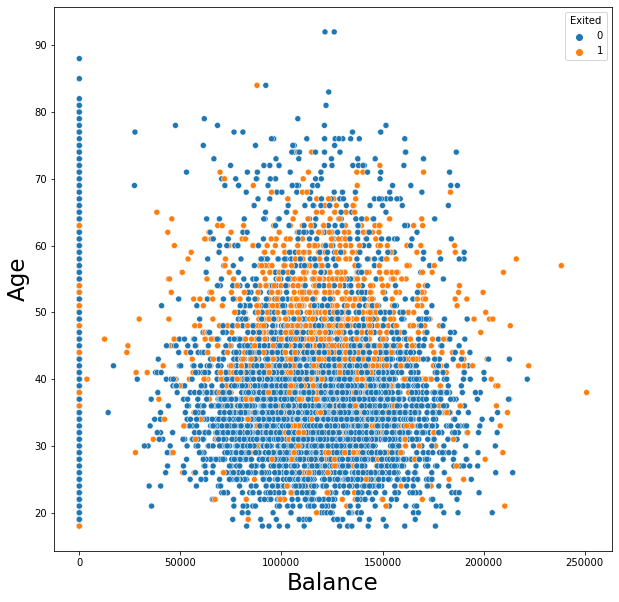

In [735]:
plt.figure(figsize=(10,10))
sns.scatterplot(x= 'Balance', y= 'Age', data=df, hue='Exited')
plt.xlabel('Balance', fontsize=23)
plt.ylabel('Age', fontsize=23)

Text(0, 0.5, 'Age')

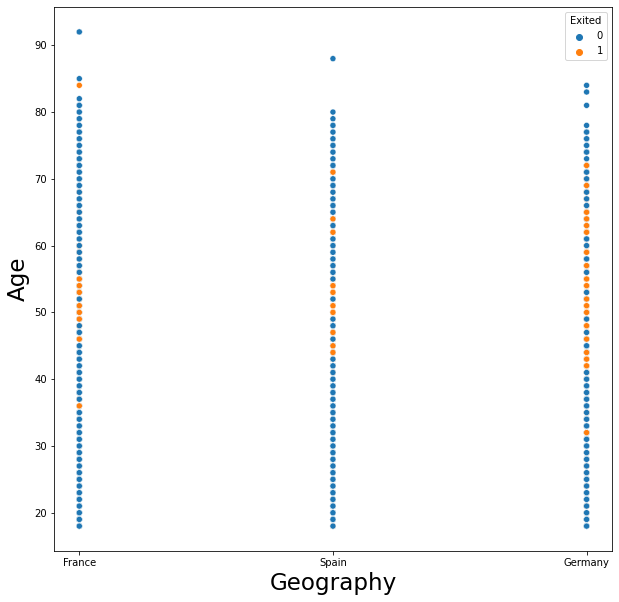

In [736]:
plt.figure(figsize=(10,10))
sns.scatterplot(x= 'Geography', y= 'Age', data=df, hue='Exited')
plt.xlabel('Geography', fontsize=23)
plt.ylabel('Age', fontsize=23)

# Comment
#### Dari beberapa grafik distribusi diatas, kita dapat simpulkan beberapa hal:
* Mayoritas umur dari nasabah yg keluar / tidak menggunakan jasa Bank kembali adalah nasabah yg: 
    * memiliki umur diatas 40 tahun,
    * memiliki umur diatas 40 tahun dan credit scorenya diantara 500-800
    * memiliki umur diatas 40 tahun & balancenya 50.000 - 200.000
    * berasal dari negara Germany, karena proporsi exitnya yg paling besar dibandingkan negara lainya
* jadi, umur memiliki pengaruh penting terhadap keluar / tidaknya seseorang dari bank. oleh karenanya, kegiatan marketingnya bisa disesuaikan dengan target nasabah yg berumur diatas 40 tahun dan berasal dari Germany

### Next kita akan analisis per featurenya

In [737]:
 df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

# Credit Score

In [738]:
df['CreditScore'].value_counts(ascending=True)

401      1
365      1
373      1
417      1
419      1
      ... 
667     53
705     53
655     54
678     63
850    233
Name: CreditScore, Length: 460, dtype: int64

* Kita akan coba buat klasifikasi dari kredit scorenya mengikuti https://www.google.com/search?q=what+is+credit+score&safe=strict&client=firefox-b-d&sxsrf=ALeKk00IBvisodtAv0Qxkb5ya6NZwZkBRg:1613976689166&tbm=isch&source=iu&ictx=1&fir=jCQmVxK9QwT6yM%252CnpEf5wVE3qNbkM%252C%252Fm%252F02p7q_9&vet=1&usg=AI4_-kThdbyN5v3SaW88n6qrDQIcvzAn-A&sa=X&ved=2ahUKEwjHvu7Z8_zuAhXWT30KHfeUA_wQ_B16BAgyEAE#imgrc=Pn5VRHKkdOJsfM untuk keperluan EDA

In [739]:
conditions=[
    (df['CreditScore']<=579), 
    ((df['CreditScore']>=580) & (df['CreditScore']<=669)), 
    ((df['CreditScore']>=670) & (df['CreditScore']<=739)),
    ((df['CreditScore']>=740) & (df['CreditScore']<=779)),
    ((df['CreditScore']>=780) & (df['CreditScore']<=850)) 
]

values = ['Very Poor', 'Fair', 'Good', 'Very Good', 'Exceptional']

df['kompilasi_kreditscore']= np.select(conditions, values)

data_kreditscore = df['kompilasi_kreditscore'].value_counts()
data_kreditscore

Fair           3331
Good           2428
Very Poor      2362
Exceptional     961
Very Good       918
Name: kompilasi_kreditscore, dtype: int64

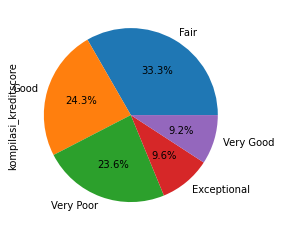

In [740]:
data_kreditscore.plot.pie(autopct="%.1f%%");

### Darisini dapat kita lihat bahwa:
* nasabah paling banyak adalah nasabah yg memiliki kredit score Fair
* Kemudian, disusul dengan namabah yg memiliki kredit score Good
* Mengkhawatirkannya, urutan ketiga didominasi oleh nassabah yg memiliki kredit score Very Poor.
* hanya ada sekitar 18%-an dari nasabah yg memiliki kredit score Very Good 7 Exceptional
* Dapat kita simpulkan bahwa 50% dari nasabah bank masih dalam kategori aman, sehingga bank juga aman

# Geography

In [741]:
Geography = df['Geography'].value_counts()
Geography

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

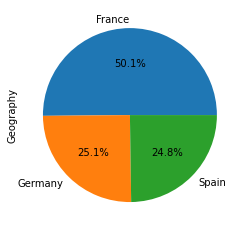

In [742]:
Geography.plot.pie(autopct="%.1f%%");

 * Dapat kita lihat pengguna bank terbesar berasal dari negara France, yg mendominasi hampir 50% dari total nasabah. 
 * Kemudian disusul pengguna dari Gernam dan Spanyol, walaupun jumlah nasabah dari kedua negara ini hanya berbeda tipis


In [743]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'kompilasi_kreditscore'],
      dtype='object')

# Gender

In [744]:
data_gender = df['Gender'].value_counts()
data_gender

Male      5457
Female    4543
Name: Gender, dtype: int64

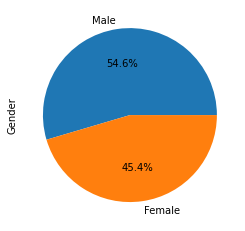

In [745]:
data_gender.plot.pie(autopct="%.1f%%");

* kita bisa lihat bahwa nasabah didominasi oleh nasabah pria sebesar 55%

# Age

In [746]:
df['Age'].value_counts()

37    478
38    477
35    474
36    456
34    447
     ... 
92      2
88      1
82      1
85      1
83      1
Name: Age, Length: 70, dtype: int64

### Karena melihat Age-nya sulit, akan kita buat klasifikasi seperti yg udah dilakuin diatas untuk keperluan EDA

In [747]:
conditions=[
    (df['Age']<=19), 
    ((df['Age']>=20) & (df['Age']<30)), 
    ((df['Age']>=30) & (df['Age']<40)),
    ((df['Age']>=40) & (df['Age']<50)), 
    ((df['Age']>=50) & (df['Age']<60)),
    (df['Age']>=60) 
]

values = ['<19', '20an', '30an', '40an', '50an', 'diatas 60']

df['kompilasi_umur']= np.select(conditions, values)

data_umur = df['kompilasi_umur'].value_counts()
data_umur

30an         4346
40an         2618
20an         1592
50an          869
diatas 60     526
<19            49
Name: kompilasi_umur, dtype: int64

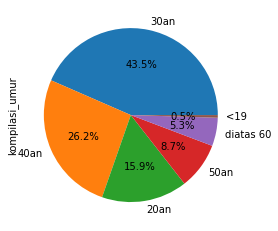

In [748]:
data_umur.plot.pie(autopct="%.1f%%");

### disini kita bisa lihat bahwa:
* mayoritas pengguna bank berumur 30an sebesar 44%, disusul dengan nasabah yg berumur 40an sebesar 26%
* pengguna ketiga terbanyak adalah yg berumur 20an
* Darisini kita bisa lihat bahwa proporsi nasabah yg berumur diatas 40 bisa mencapai lebih dari 30%. Mengigat bahwa nasabah yg banyak keluar adalah nasabah yg berumur diatas 40, maka sangat penting bagi bank untuk segera memfokuskan dirinya agar nasabah yg keluar tidak semakin banyak

In [749]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'kompilasi_kreditscore',
       'kompilasi_umur'],
      dtype='object')

# Pertanyaan 2
B. Data Cleaning & Preprocessing (15 poin)

Jelaskan tahapan dan alasan untuk setiap langkah preprocessing yang Anda lakukan.

Buatlah kode untuk preprocessing yang Anda lakukan dengan Pipeline, jika diperlukan, dan ColumnTransformer. Simpan kode tersebut di dalam variable transformer.

# Tahapan yg akan saya lakukan antara lain:
* Melihat features yg memiliki outlier dan mengeluarkan outliernya dari dataset
* Menentukan encoding untuk features yg bersifat classification
* define & splitting data

### Feature yg dianggap memiliki outlier antara lain:
* Age, Balance, NumOfProducts

## Pertama cek outlier Age dulu

In [750]:
min_thresold, max_thresold = df.Age.quantile([0, 0.98])
min_thresold, max_thresold

(18.0, 67.0)

In [751]:
min_thresold, max_thresold = df.Age.quantile([0, 0.999])
min_thresold, max_thresold

(18.0, 81.0)

In [752]:
min_thresold, max_thresold = df.Age.quantile([0, 0.99])
min_thresold, max_thresold

(18.0, 72.0)

* disini kita menjadikan nilai batas bawah nya 0% dari dataset dan nilai batas atasnya 0.98 ~ 98% dari dataset. 

#### pertimbangan pertamanya adalah, variabel Age ini menunjukan umur Nasabah. Seseorang secara umur baru dapat membuat rekening ketika sudah berumur 17 tahun keatas (mengacu ke: https://www.google.com/search?client=firefox-b-d&q=minimal+umur+membuat+rekening). Oleh karenanya, Kalau dibawah 17 tahun itu merupakan outlier

#### pertimbangan kedua: dalam menentukan batas atasnya, dicari percentile yg mana perubahanya itu signifikan. kita tahu bahwa nilai ke 75% dari datasetnya adalah umur 44 tahun dan nilai maxnya itu 92 tahun. berarti pada rentan 25% terakhir, age gapnya bisa sampai 48 tahun. Nah, menurut saya, kisaran umur 60-70 belum termasuk outlier. Oleh karenanya, saya mencari quantile yg data terakhirnya itu adalah umur 60an mau ke 70an. Dari percobaan, terlihat dari 0.97 ke 0.98, ada perbuhahan range umur sebesar 3 poin. namun dari 0.978 ke 0.99, perubahan poinnya langsung 5 poin. artinya, perubahan range dari datasetnya sudah melebihi batas normal (which is normalnya 2-3 poin), sehingga dipakailah batas atas 0.98

next kita cek berapa jumlah data yg outlier

In [753]:
len(df[df['Age']>max_thresold]['Age'])

85

Dataset outlier ini akan kita keluarkan dan kita buat dataset baru

In [754]:
df = df[(df['Age']>=min_thresold) & (df['Age']<=max_thresold)]
df.shape

(9915, 16)

Darisini dapat kita lihat bahwa dataset yg baru memiliki 85 unit lebih sedikit dibandingkan dataset awal, karena kita mengeluarkan outlier dari Age

# Cek outlier Balance

In [755]:
min_thresold, max_thresold = df.Balance.quantile([0.3614, 0.996])
min_thresold, max_thresold

(0.0, 197532.83383999977)

In [756]:
min_thresold, max_thresold = df.Balance.quantile([0.3615, 0.996])
min_thresold, max_thresold

(3433.2765900002196, 197532.83383999977)

### Disini quantile yg saya ambil 36.15% - 99.6% 

### Pertimbangan pertama: Target kita adalah mengetahui faktor2 yg mempengaruhi seseorang untuk tetap menambung. kenapa kita ingin orang tetap menambung? agar kita sebagai bank dapat menghasilkan uang. sehingga, orang2 yg menabung tapi TIDAK MEMILIKI UANG bukanlah target kita. oleh karenanya, orang2 yg mtabugnannya itu 0 = outlier. 

### Pertimbangan kedua: kita mengetahui bahwa nilai ke 75% dari datasetnya adalah sebesar 127644.240000. Menurut saya, seseorang yg memiliki balance <200K masih masuk ke batas normal. oleh karenanya, saya mencoba dan menemukan quantile ke 99.6% lah yg paling tepat

In [757]:
len(df[df['Balance']<min_thresold]['Balance'])

3584

In [758]:
len(df[df['Balance']>max_thresold]['Balance'])

40

Terdapat 3584 + 40 data outlier, next akan kita keluarkan

In [759]:
df = df[(df['Balance']>=min_thresold) & (df['Balance']<=max_thresold)]
df.shape

(6291, 16)

# Cek outlier Num of Products

In [760]:
min_thresold, max_thresold = df.NumOfProducts.quantile([0, 0.992])
min_thresold, max_thresold

(1.0, 3.0)

### Disini quantile yg saya ambil 0% - 99.2%

### dari data, kita ketahui bahwa minimalnya itu 1 produk dan maximalnya itu 4 produk. menurut saya, diatas 3 itu merupakan outlier. oleh karenanya, akan saya keluarkan

In [761]:
len(df[df['NumOfProducts']>max_thresold]['NumOfProducts'])

46

Terdapat 46 data yg perlu saya keluarkan

In [762]:
df = df[(df['NumOfProducts']>=min_thresold) & (df['NumOfProducts']<=max_thresold)]
df.shape

(6245, 16)

## Pada akhirnya, saya hanya tersisa dengan 6245 dataset yg menurut saya sudah normal. next kita akan menentukan encoding

In [763]:
df.head(1)

RowNumber  CustomerId Surname  CreditScore Geography  Gender  Age  Tenure  \
1          2    15647311    Hill          608     Spain  Female   41       1   

    Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  \
1  83807.86              1          0               1        112542.58   

   Exited kompilasi_kreditscore kompilasi_umur  
1       0                  Fair           40an

# Comment
* kita mengetahui bahwa kolom yg bersifat classification itu kolom Geography & Gender. oleh karenanya, kita hanya akan mengencode 2 kolom tersebut
* kita akan gunakan One Hot Encoding untuk kolom Gender & Geography. kita ga bisa pakai ordinal encoding karena kedua kolom ini ga punya orde. kita bisa aja pakai binary, tapi karena variabel dari featurenya ga banyak, cukup pakai One Hot Encoding, yg penting di drop first agar datanya ga bias

## Pipeline
* Pipeline digunakan ketika terdapat lebih dari 1 step berurutan yg harus dilakukan sebelum dilakukannya encoding -> pipeline memudahkan kita dan menjadikannya 1 kode saja
* pada kasus feature yg mau kita encode jadi binary, kita bisa terapkan pipeline untuk 1) mengisi missing value feature tersebut terlebih dahulu, kemudian 2) kita masukan fungsi encode
* pada akhirnya sih untuk menspesifikasikan kolom2 apa saja yg perlu di encode, kita tetap state kolom2 tersebut di transformer
* pada kasus ini, ga ada missing value sehingga pipeline tidak dibutuhkan

## Transformer
* Transformer digunakan ketika terdapat beberapa feature yg perlu kita encoding, namun setiap feature bisa saja membutuhkan encoding yg berbeda
* transformer memudahkan kita sehingga kita bisa melakukan encoding hanya pada 1 kodingan saja

In [764]:
transformer = ColumnTransformer([
    ('one hot encoding', OneHotEncoder(drop='first'), ['Gender', 'Geography'])
], remainder='passthrough')

# Pertanyaan 3

C. Model Benchmark & Evaluation Metric (30 poin)

    Pilihlah setidaknya 3 model machine learning yang Anda pahami untuk mendapatkan benchmark model ML untuk memprediksi apakah nasabah akan exit atau tidak!

        Gunakan setidaknya satu ensemble model.
        Jelaskan secara singkat cara kerja model ML yang Anda gunakan!

    Metric evaluasi apa yang anda pilih guna mencegah nasabah menutup akun mereka? Jelaskan pilihan jawaban anda!


## Comment
* saya akan coba pakai Logit, Decision Tree Classifier & KNN. untuk ensemble model saya belum sampai situ belajarnya... maaf kak belum sempet nyelesaiin semua materinya, masih banyak..


In [765]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'kompilasi_kreditscore',
       'kompilasi_umur'],
      dtype='object')

### kita akan define x & y nya
* x nya itu feature2 yg digunakan. disini kita akan drop feature2 yg ga digunakan seperti: 'RowNumber', 'CustomerId', 'Surname','kompilasi_kreditscore','kompilasi_umur'
* 'RowNumber', 'CustomerId', 'Surname' itu bukan bersifat prediktor dan memang ga bisa dipakai, sedangkan 'kompilasi_kreditscore','kompilasi_umur' saya drop karena itu kolom kompilasi aja untuk memudahkan EDA. kalau pakai kolom ini, nanti harus di encode lagi, sedangkan udah ada data numerik yg sifatnya lebih kredibel. kalau di encode kan artinya representatif, bukan nilai riilnya
* y nya itu kolom Exited

In [766]:
y = df.loc[:, ['Exited']]
x = df.drop(columns=['RowNumber', 'CustomerId', 'Surname','kompilasi_kreditscore','kompilasi_umur', 'Exited'])

In [767]:
x

CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
1             608     Spain  Female   41       1   83807.86              1   
2             502    France  Female   42       8  159660.80              3   
4             850     Spain  Female   43       2  125510.82              1   
5             645     Spain    Male   44       8  113755.78              2   
8             501    France    Male   44       4  142051.07              2   
...           ...       ...     ...  ...     ...        ...            ...   
9991          597    France  Female   53       4   88381.21              1   
9993          644    France    Male   28       7  155060.41              1   
9996          516    France    Male   35      10   57369.61              1   
9998          772   Germany    Male   42       3   75075.31              2   
9999          792    France  Female   28       4  130142.79              1   

      HasCrCard  IsActiveMember  EstimatedSalary  
1             0               1        112542.58  
2             1               0        113931.57  
4             1               1         79084.10  
5             1               0        149756.71  
8             0               1         74940.50  
...         ...             ...              ...  
9991          1               0         69384.71  
9993          1               0         29179.52  
9996          1               1        101699.77  
9998          1               0         92888.52  
9999          1               0         38190.78  

[6245 rows x 10 columns]

### next kita akan split & transform data kategoricalnya

In [768]:
x_train, x_test, y_train, y_test = train_test_split(
    x,
    y,
    stratify=y,
    random_state=10
)

In [769]:
x_train_preprocessed = transformer.fit_transform(x_train) 
x_test_preprocessed = transformer.transform(x_test)

### kode diatas bermakna bahwa kita akan mentransformasi data kategorikalnya menjadi data numerik. kemudian, kita hanya perlu nge fit ke data train nya aja, engga ke kedua duanya karena kalau kita fit ke kedua duanya, skalanya range awal & akhir nya akan jadi berbeda

In [770]:
x_train_preprocessed

# harusnya outputnya dalam bentuk array

array([[1.0000000e+00, 1.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        0.0000000e+00, 1.7709216e+05],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        0.0000000e+00, 6.1257830e+04],
       [1.0000000e+00, 1.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        0.0000000e+00, 5.3667080e+04],
       ...,
       [1.0000000e+00, 0.0000000e+00, 1.0000000e+00, ..., 1.0000000e+00,
        1.0000000e+00, 1.0074050e+04],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        0.0000000e+00, 1.1837255e+05],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        1.0000000e+00, 1.1647143e+05]])

In [771]:
x_train_preprocessed=pd.DataFrame(x_train_preprocessed)
x_test_preprocessed= pd.DataFrame(x_test_preprocessed)
x_train_preprocessed

# nanti outputnya ga punya nama

0    1    2      3     4    5          6    7    8    9          10
0     1.0  1.0  0.0  612.0  32.0  9.0  106520.73  2.0  1.0  0.0  177092.16
1     0.0  0.0  0.0  690.0  26.0  3.0  118097.87  1.0  1.0  0.0   61257.83
2     1.0  1.0  0.0  714.0  33.0  3.0   35016.60  1.0  1.0  0.0   53667.08
3     1.0  1.0  0.0  588.0  49.0  6.0  132623.76  3.0  1.0  0.0   36292.94
4     1.0  1.0  0.0  759.0  31.0  4.0   98899.91  1.0  1.0  1.0   47832.82
...   ...  ...  ...    ...   ...  ...        ...  ...  ...  ...        ...
4678  0.0  1.0  0.0  680.0  42.0  7.0  105722.69  1.0  1.0  1.0   90558.24
4679  1.0  0.0  0.0  823.0  71.0  5.0  149105.08  1.0  0.0  1.0  162683.06
4680  1.0  0.0  1.0  539.0  38.0  8.0   71460.67  2.0  1.0  1.0   10074.05
4681  0.0  0.0  0.0  423.0  36.0  5.0   97665.61  1.0  1.0  0.0  118372.55
4682  1.0  0.0  0.0  696.0  28.0  4.0  172646.82  1.0  1.0  1.0  116471.43

[4683 rows x 11 columns]

In [772]:
transformer.transformers_

# ini untuk manggil namanya

[('one hot encoding', OneHotEncoder(drop='first'), ['Gender', 'Geography']),
 ('remainder', 'passthrough', [0, 3, 4, 5, 6, 7, 8, 9])]

In [773]:
transformer.transformers_[0]

('one hot encoding', OneHotEncoder(drop='first'), ['Gender', 'Geography'])

In [774]:
transformer.transformers_[0][1]

OneHotEncoder(drop='first')

In [775]:
transformer.transformers_[0][1].get_feature_names()

# disini kita bisa dapet nama2 dari kolom yg udah di encode

array(['x0_Male', 'x1_Germany', 'x1_Spain'], dtype=object)

In [776]:
# nextnya kita gabungin nama2 kolom yg udah di encode ke dataframe baru. nanti outputnya itu keluar nama2 kolom yg baru

features = list(transformer.transformers_[0][1].get_feature_names()) + ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard','IsActiveMember', 'EstimatedSalary']

features

['x0_Male',
 'x1_Germany',
 'x1_Spain',
 'CreditScore',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary']

In [777]:
# kemudian kita gabungin ke dataframe yg baru dibuat. ini adalah dataframe yg baru

x_train_preprocessed.columns=features
x_test_preprocessed.columns=features
x_train_preprocessed

x0_Male  x1_Germany  x1_Spain  CreditScore   Age  Tenure    Balance  \
0         1.0         1.0       0.0        612.0  32.0     9.0  106520.73   
1         0.0         0.0       0.0        690.0  26.0     3.0  118097.87   
2         1.0         1.0       0.0        714.0  33.0     3.0   35016.60   
3         1.0         1.0       0.0        588.0  49.0     6.0  132623.76   
4         1.0         1.0       0.0        759.0  31.0     4.0   98899.91   
...       ...         ...       ...          ...   ...     ...        ...   
4678      0.0         1.0       0.0        680.0  42.0     7.0  105722.69   
4679      1.0         0.0       0.0        823.0  71.0     5.0  149105.08   
4680      1.0         0.0       1.0        539.0  38.0     8.0   71460.67   
4681      0.0         0.0       0.0        423.0  36.0     5.0   97665.61   
4682      1.0         0.0       0.0        696.0  28.0     4.0  172646.82   

      NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  
0               2.0        1.0             0.0        177092.16  
1               1.0        1.0             0.0         61257.83  
2               1.0        1.0             0.0         53667.08  
3               3.0        1.0             0.0         36292.94  
4               1.0        1.0             1.0         47832.82  
...             ...        ...             ...              ...  
4678            1.0        1.0             1.0         90558.24  
4679            1.0        0.0             1.0        162683.06  
4680            2.0        1.0             1.0         10074.05  
4681            1.0        1.0             0.0        118372.55  
4682            1.0        1.0             1.0        116471.43  

[4683 rows x 11 columns]

# Feature Selection

### saya akan melakukan feature selection untuk memilih feature mana yg memang berpengaruh terhadap target. kali ini saya menggunakan visualisasi melalui heatmap & menggunakan Metode Iterative

<AxesSubplot:>

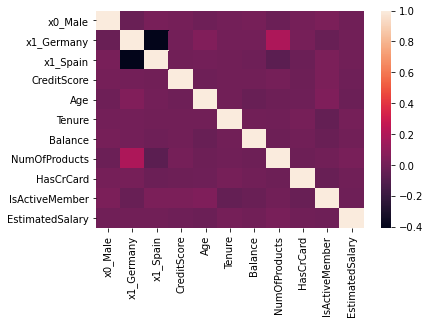

In [778]:
corr = x_train_preprocessed.corr()
sns.heatmap(corr)

In [779]:
select = SelectPercentile(percentile=80)
select.fit(x_train_preprocessed, y_train)

SelectPercentile(percentile=80)

Percentile disini maksudnya adalah mesin akan mengambil 80% dari total feature yg mana feature tersebut memiliki output nilai yg bagus

In [780]:
x_train_preprocessed_selected=select.transform(x_train_preprocessed)
x_test_preprocessed_selected= select.transform(x_test_preprocessed)

In [781]:
print('shape before selection', x_train_preprocessed.shape)
print('shape after selection', x_train_preprocessed_selected.shape)

shape before selection (4683, 11)
shape after selection (4683, 8)


### disini dapat kita lihat bahwa sebelumnya, terdapat 11 feature. namun setelah dilakukan feature selection, hanya tersisa 5 feeature. feature apa sajakah yg tersisa?


In [782]:
# untuk melihat feature mana aja yg tersisa, kita gunakan mask

mask=select.get_support()
mask

array([ True,  True,  True,  True,  True,  True, False,  True, False,
        True, False])

In [783]:
selected_features=pd.DataFrame({
    'indicator':mask,
    'features': features
})
selected_features[selected_features['indicator']==True]

indicator        features
0       True         x0_Male
1       True      x1_Germany
2       True        x1_Spain
3       True     CreditScore
4       True             Age
5       True          Tenure
7       True   NumOfProducts
9       True  IsActiveMember

### darisini, kita bisa lihat bahwa yg tersisa hanyalah feature male, Germany, Spain, Age, creditscore, tenure, num of products, IsActiveMember

## Model Fitting
* fitting adalah proses modelnya belajar dari dataframe yg kita sediakan untuk belajar --> makanya di fit ke x_train & y_train
* karena x_trainnya udah di preprocessed, maka pakai x_train_preprocessed

## Model Evaluation
* setelah di fitting, masuk ke proses evaluasi.
* EVALUASI adalah: kita kasih 1 set data baru (TANPA KITA KASIH JAWABAN DARI TARGETNYA, WALAUPUN JAWABAN TARGETNYA ITU ADA), dan kita minta mereka membuat kesimpulan / mencari jawaban atas target
* dataset baru yg GA KITA KASIH TARGETNYA itu disebut x_test_preprocessed
* setelah modelnya melakukan kalkulasi, kita BANDINGIN JAWABAN SI ROBOT (y_pred) DENGAN JAWABAN/ TARGET YG ASLI (y_test), jadi kita bisa melihat SEBERAPA BAGUS PREDIKSI SI ROBOT
* Setiap model cara evaluasinya BERBEDA. kalau LOGIT itu biasanya pakai accuracy score. accuracy score menggambarkan berapa persen dari prediksi yang benar 

# Model 1. Logistic Regression with no other preprocessed treatment

In [784]:
logreg = LogisticRegression(max_iter=1000, solver='liblinear', C=10)
logreg.fit(x_train_preprocessed_selected, y_train)
y_pred = logreg.predict(x_test_preprocessed_selected)
print('akurasi score', accuracy_score(y_test, y_pred))

akurasi score 0.8015364916773368


# Comment 
* Kalau kita sekedar melihat accuracy scorenya, kita bisa bilang bahwa model yg baru aja kita buat bisa memprediksi 80% output secara benar. namun tentunya hal tersebut bukanlah yg terpenting, karena metrik evaluasinya harus kita sesuaikan dengan kebutuhan kita.

* kalau kita lihat dari dataset kita, kita itu sebenernya lebih ingin meminimalisir resiko agar orang2 tidak exit. kita bisa aja ingin mengetahui variabel2 apa saja yg membuat orang tidak exit, namun feature kita tidak representatif kearah sana, namun lebih kearah meminimalisir resiko agar orang2 tidak exit (False Negatif). Oleh karenanya, kita gunakan recall.

#### Recall biasanya digunakan ketika kita ingin meminimalkan/menekan False Negatif. Contoh: dalam perbankan, kita ingin menekan angka fraud sebesar mungkin. Hal ini guna meminimalisir resiko

* Recall Positif: Jumlah yg diprediksi POSITIF dari semua yang AKTUAL-NYA POSITIF
* Recall Negatif: Jumlah yg diprediksi NEGATIF dari semua yang AKTUAL-NYA NEGATIF

### Contoh pemahaman:
* Target (1) = keluar dari bank, (0) = tidak keluar dari bank
* True Positif: Orang yg kita prediksi keluar & ternyata benar keluar
* True Negatif: Orang yg kita prediksi tidak keluar & ternyata benar tidak keluar
* False Positif: Orang yg kita prediksi keluar TAPI ternyata tidak keluar
* False Negatif: Orang yg kita prediksi tidak keluar Covid TAPI ternyata keluar

Kita buat confucion matrixnya agar terlihat false negatifnya

In [785]:
confusion_matrix(y_test, y_pred)

array([[1142,   53],
       [ 257,  110]], dtype=int64)

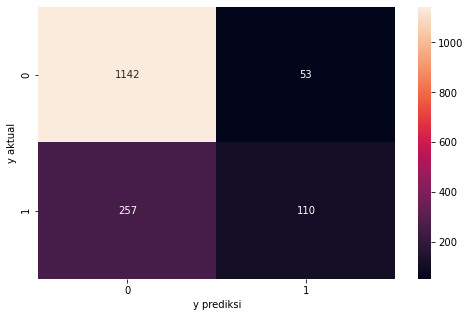

In [786]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='.0f', ax=ax)
plt.xlabel('y prediksi')
plt.ylabel('y aktual')
plt.show()

disini kita bisa lihat False Negatifnya berhasil memprediksi 260 orang

In [787]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.96      0.88      1195
           1       0.67      0.30      0.42       367

    accuracy                           0.80      1562
   macro avg       0.75      0.63      0.65      1562
weighted avg       0.78      0.80      0.77      1562



In [788]:
recall_score(y_test, y_pred, pos_label=1)

0.2997275204359673

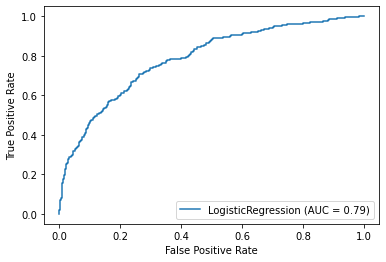

In [789]:
plot_roc_curve(logreg, x_test_preprocessed_selected, y_test)

## Dari hasil classification report, dapat kita ketahui bahwa model kita hanya dapat memprediksi 30% dari total prediksi vs riil secara benar (NILAI RECALL). ini hitungannya sangat rendah..

# Model 2. Decision Tree with no other preprocessed treatment

In [790]:
model = DecisionTreeClassifier (max_depth=3)
model.fit(x_train_preprocessed, y_train)
y_pred = model.predict(x_test_preprocessed) 
print('accuracy:', accuracy_score(y_test,y_pred))    

accuracy: 0.8271446862996159


### disini kita coba dulu maxdepthnya itu 3, artinya si mesin hanya akan ngesplit sebanyak 3x kebawah..
* kalau sekedar dari akurasinya, aurasinya bagus karena bisa memprediksi 82.7% dari dataset yg benar. namun, karena disini kita ingin mengetahui False Negatifnya, maka kita pakai calssification report

In [791]:
confusion_matrix(y_test, y_pred)

array([[1121,   74],
       [ 196,  171]], dtype=int64)

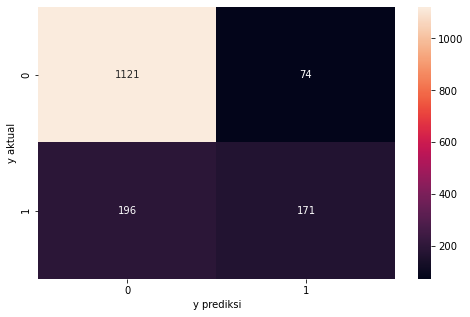

In [792]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='.0f', ax=ax)
plt.xlabel('y prediksi')
plt.ylabel('y aktual')
plt.show()

In [793]:
### disini dapat kita lihat bahwa mesin berhasil memprediksi sekitar 196 prediksi secara benar

In [794]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.94      0.89      1195
           1       0.70      0.47      0.56       367

    accuracy                           0.83      1562
   macro avg       0.77      0.70      0.73      1562
weighted avg       0.82      0.83      0.81      1562



## secara nilai recall, model decision tree menghasilkan output yg lebih baik dibandingkan LOGIT.. Logit hanya 29% sedangkan decision Tree sampai 47%

kita juga bisa cek fitur2 mana aja yg sebenernya prioritas dalam decision tree. hal ini guna mengetahui pembagi pertama dari model decision treenya

In [795]:
importance_table=pd.DataFrame({
    'imp': model.feature_importances_
}, index=features)

In [796]:
importance_table

imp
x0_Male          0.000000
x1_Germany       0.000000
x1_Spain         0.000000
CreditScore      0.000000
Age              0.604560
Tenure           0.008060
Balance          0.000000
NumOfProducts    0.228332
HasCrCard        0.000000
IsActiveMember   0.159048
EstimatedSalary  0.000000

kita bisa lihat bahwa feature yg paling pertama dan pentin gitu age. jadi decision tree akan ngebadi berdasarkan agenya terlebih dahulu

<AxesSubplot:>

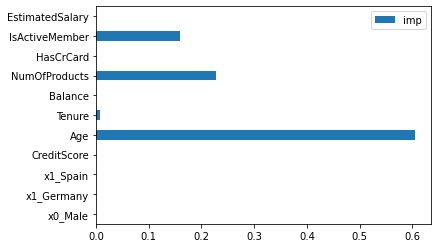

In [797]:
importance_table.plot(kind='barh')

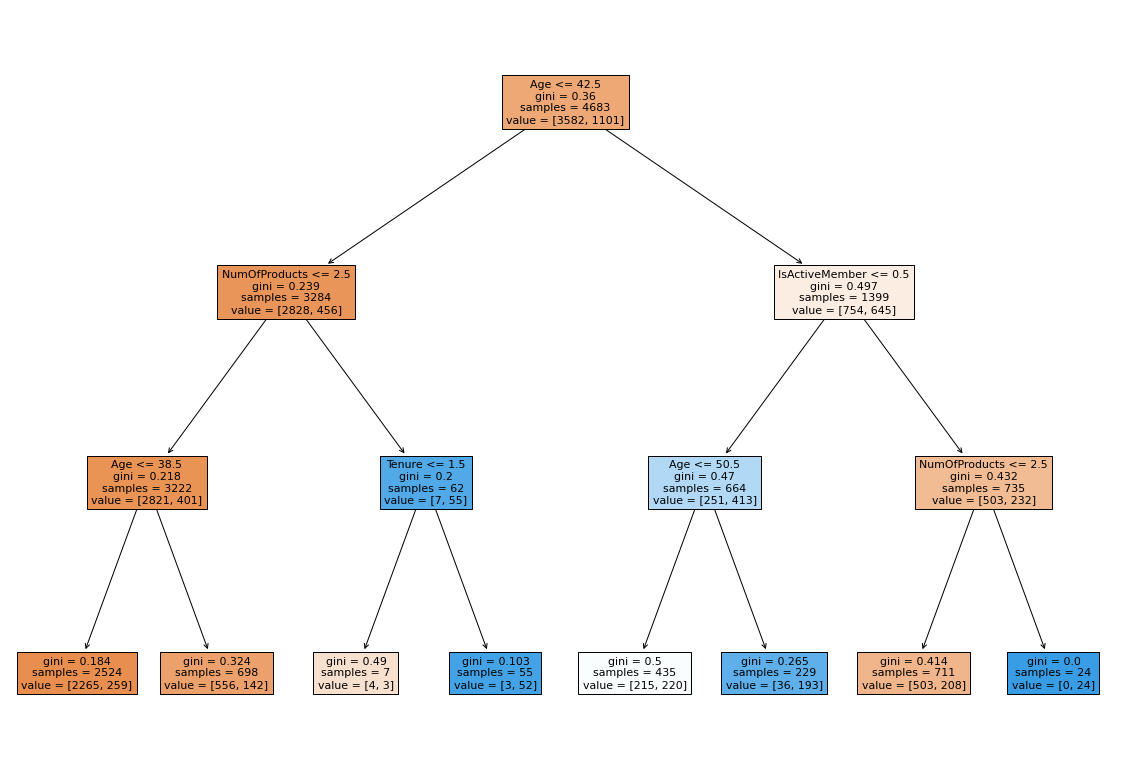

In [798]:
plt.figure(figsize=(20,14))
plot_tree(model, feature_names = features, filled=True)
plt.show()

# Pertanyaan 4

D. Model Improvement dan Hyper-parameter Tuning (30 poin)

    Bagaimana performa model benchmark Anda? Kira-kira apa yang bisa Anda lakukan untuk meningkatkan performa model Anda lebih jauh? Jelaskan! (coba perhatikan ratio nasabah yang keluar dan tidak)

    Setelah Anda meningkatkan performa benchmark model Anda, lakukan hyperparameter tunning untuk meningkatkan preforma model Anda lebih jauh! Parameter apa saja yang anda pilih untuk tunning? Jelaskan maksud dari tiap-tiap parameter tersebut!

    Buat kesimpulan akhir, model mana yang akan Anda pakai untuk memprediksi apakah nasabah akan menutup akun atau tidak!


### Kita akan coba hyperparameter tuning dengan cara mengubah LOGITnya menjadi polynomial, serta menggunakan SMOTE

# 1. LOGIT + POLYNOMIAL
* Dalam kehidupan nyata, korelasi antar variabel tidak selalu lurus menerus. adakalanya korelasinya itu berbentuk kurva cekung, dsb. oleh karenanya kita gunakan polynomial. tujuan dari polynoial adalah agar dataset dapat lebih merepresentasikan dunia nyata (https://towardsdatascience.com/introduction-to-linear-regression-and-polynomial-regression-f8adc96f31cb)

In [799]:
poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
x_train_poly=poly.fit_transform(x_train_preprocessed_selected)
x_test_poly=poly.transform(x_test_preprocessed_selected)

In [800]:
poly.get_feature_names()

['x0',
 'x1',
 'x2',
 'x3',
 'x4',
 'x5',
 'x6',
 'x7',
 'x0^2',
 'x0 x1',
 'x0 x2',
 'x0 x3',
 'x0 x4',
 'x0 x5',
 'x0 x6',
 'x0 x7',
 'x1^2',
 'x1 x2',
 'x1 x3',
 'x1 x4',
 'x1 x5',
 'x1 x6',
 'x1 x7',
 'x2^2',
 'x2 x3',
 'x2 x4',
 'x2 x5',
 'x2 x6',
 'x2 x7',
 'x3^2',
 'x3 x4',
 'x3 x5',
 'x3 x6',
 'x3 x7',
 'x4^2',
 'x4 x5',
 'x4 x6',
 'x4 x7',
 'x5^2',
 'x5 x6',
 'x5 x7',
 'x6^2',
 'x6 x7',
 'x7^2']

In [801]:
pd.DataFrame(x_train_poly, columns=poly.get_feature_names())

x0   x1   x2     x3    x4   x5   x6   x7  x0^2  x0 x1  ...    x4^2  \
0     1.0  1.0  0.0  612.0  32.0  9.0  2.0  0.0   1.0    1.0  ...  1024.0   
1     0.0  0.0  0.0  690.0  26.0  3.0  1.0  0.0   0.0    0.0  ...   676.0   
2     1.0  1.0  0.0  714.0  33.0  3.0  1.0  0.0   1.0    1.0  ...  1089.0   
3     1.0  1.0  0.0  588.0  49.0  6.0  3.0  0.0   1.0    1.0  ...  2401.0   
4     1.0  1.0  0.0  759.0  31.0  4.0  1.0  1.0   1.0    1.0  ...   961.0   
...   ...  ...  ...    ...   ...  ...  ...  ...   ...    ...  ...     ...   
4678  0.0  1.0  0.0  680.0  42.0  7.0  1.0  1.0   0.0    0.0  ...  1764.0   
4679  1.0  0.0  0.0  823.0  71.0  5.0  1.0  1.0   1.0    0.0  ...  5041.0   
4680  1.0  0.0  1.0  539.0  38.0  8.0  2.0  1.0   1.0    0.0  ...  1444.0   
4681  0.0  0.0  0.0  423.0  36.0  5.0  1.0  0.0   0.0    0.0  ...  1296.0   
4682  1.0  0.0  0.0  696.0  28.0  4.0  1.0  1.0   1.0    0.0  ...   784.0   

      x4 x5  x4 x6  x4 x7  x5^2  x5 x6  x5 x7  x6^2  x6 x7  x7^2  
0     288.0   64.0    0.0  81.0   18.0    0.0   4.0    0.0   0.0  
1      78.0   26.0    0.0   9.0    3.0    0.0   1.0    0.0   0.0  
2      99.0   33.0    0.0   9.0    3.0    0.0   1.0    0.0   0.0  
3     294.0  147.0    0.0  36.0   18.0    0.0   9.0    0.0   0.0  
4     124.0   31.0   31.0  16.0    4.0    4.0   1.0    1.0   1.0  
...     ...    ...    ...   ...    ...    ...   ...    ...   ...  
4678  294.0   42.0   42.0  49.0    7.0    7.0   1.0    1.0   1.0  
4679  355.0   71.0   71.0  25.0    5.0    5.0   1.0    1.0   1.0  
4680  304.0   76.0   38.0  64.0   16.0    8.0   4.0    2.0   1.0  
4681  180.0   36.0    0.0  25.0    5.0    0.0   1.0    0.0   0.0  
4682  112.0   28.0   28.0  16.0    4.0    4.0   1.0    1.0   1.0  

[4683 rows x 44 columns]

In [802]:
logreg=LogisticRegression(max_iter=1000)
logreg.fit(x_train_poly, y_train)
y_pred=logreg.predict(x_test_poly)
print('akurasi=', accuracy_score(y_test, y_pred))

akurasi= 0.8021766965428937


In [803]:
confusion_matrix(y_test, y_pred)

array([[1149,   46],
       [ 263,  104]], dtype=int64)

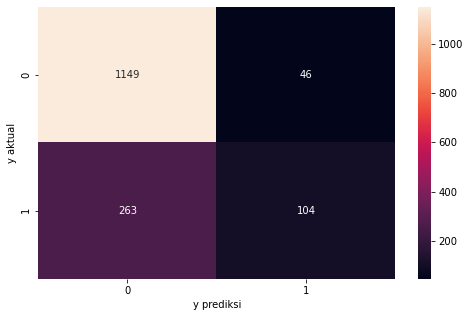

In [804]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='.0f', ax=ax)
plt.xlabel('y prediksi')
plt.ylabel('y aktual')
plt.show()

### Berhasil prediksi 263 dataset

In [805]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.96      0.88      1195
           1       0.69      0.28      0.40       367

    accuracy                           0.80      1562
   macro avg       0.75      0.62      0.64      1562
weighted avg       0.79      0.80      0.77      1562



### Dapat kita bandingkan antara model LOGIT dengan model LOGIT+POLY, recall scorenya lebih rendah ketika menggunakan LOGIT+POLY (28% dibandingkan 29%). artinya, Hyperparameter tuningnya ga diperlukan

next kita akan coba bandingkan model LOGIT dengan LOGIT+SMOTE, LOGIT+POLY+SMOTE

# 2. LOGIT + SMOTE
* SMOTE ini merupakan teknik oversampling dimana dilakukannya duplikasi dari data minoritas agar dapat menyamai data mayoritas
* kekurangan dari SMOTE ini antara lain 

In [806]:
os_data_x,os_data_y=os.fit_sample(x_train_preprocessed_selected, y_train)
os_data_x = pd.DataFrame(data=os_data_x)
os_data_y= pd.DataFrame(data=os_data_y)

In [807]:
logreg = LogisticRegression()
logreg.fit(os_data_x, os_data_y)
y_pred = logreg.predict(x_test_preprocessed_selected)
print('metric accuracy:', accuracy_score(y_test, y_pred))    

metric accuracy: 0.7099871959026889


In [808]:
confusion_matrix(y_test, y_pred)

array([[854, 341],
       [112, 255]], dtype=int64)

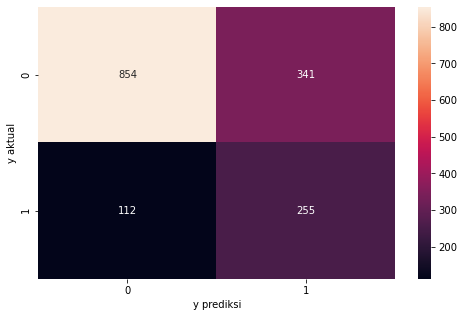

In [809]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='.0f', ax=ax)
plt.xlabel('y prediksi')
plt.ylabel('y aktual')
plt.show()

In [810]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.71      0.79      1195
           1       0.43      0.69      0.53       367

    accuracy                           0.71      1562
   macro avg       0.66      0.70      0.66      1562
weighted avg       0.78      0.71      0.73      1562



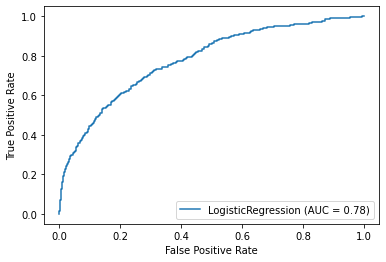

In [811]:
plot_roc_curve(logreg, x_test_preprocessed_selected, y_test)

### ketika kita pakai model LOGIT + SMOTE, hasilnya naik jauh! dari yg recallnya 29% jadi 69%!

# 3. LOGIT + POLY + SMOTE

In [812]:
os_data_x,os_data_y=os.fit_sample(x_train_preprocessed_selected, y_train)
os_data_x = pd.DataFrame(data=os_data_x)
os_data_y= pd.DataFrame(data=os_data_y)

In [813]:
poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
x_train_poly=poly.fit_transform(os_data_x)
x_test_poly=poly.transform(x_test_preprocessed_selected)

In [814]:
poly.get_feature_names()

['x0',
 'x1',
 'x2',
 'x3',
 'x4',
 'x5',
 'x6',
 'x7',
 'x0^2',
 'x0 x1',
 'x0 x2',
 'x0 x3',
 'x0 x4',
 'x0 x5',
 'x0 x6',
 'x0 x7',
 'x1^2',
 'x1 x2',
 'x1 x3',
 'x1 x4',
 'x1 x5',
 'x1 x6',
 'x1 x7',
 'x2^2',
 'x2 x3',
 'x2 x4',
 'x2 x5',
 'x2 x6',
 'x2 x7',
 'x3^2',
 'x3 x4',
 'x3 x5',
 'x3 x6',
 'x3 x7',
 'x4^2',
 'x4 x5',
 'x4 x6',
 'x4 x7',
 'x5^2',
 'x5 x6',
 'x5 x7',
 'x6^2',
 'x6 x7',
 'x7^2']

In [815]:
pd.DataFrame(x_train_poly, columns=poly.get_feature_names())

x0        x1        x2          x3         x4        x5        x6  \
0     1.000000  1.000000  0.000000  612.000000  32.000000  9.000000  2.000000   
1     0.000000  0.000000  0.000000  690.000000  26.000000  3.000000  1.000000   
2     1.000000  1.000000  0.000000  714.000000  33.000000  3.000000  1.000000   
3     1.000000  1.000000  0.000000  588.000000  49.000000  6.000000  3.000000   
4     1.000000  1.000000  0.000000  759.000000  31.000000  4.000000  1.000000   
...        ...       ...       ...         ...        ...       ...       ...   
7159  1.000000  0.000000  0.157317  725.898780  61.471951  0.471951  2.000000   
7160  0.468580  0.468580  0.000000  796.125681  58.594261  4.594261  1.000000   
7161  1.000000  1.000000  0.000000  535.000000  39.991415  7.004292  1.000000   
7162  0.000000  0.884147  0.000000  664.652441  36.420735  3.115853  1.000000   
7163  0.499224  0.499224  0.000000  727.500776  45.500776  3.996895  1.499224   

            x7      x0^2     x0 x1  ...         x4^2       x4 x5       x4 x6  \
0     0.000000  1.000000  1.000000  ...  1024.000000  288.000000   64.000000   
1     0.000000  0.000000  0.000000  ...   676.000000   78.000000   26.000000   
2     0.000000  1.000000  1.000000  ...  1089.000000   99.000000   33.000000   
3     0.000000  1.000000  1.000000  ...  2401.000000  294.000000  147.000000   
4     1.000000  1.000000  1.000000  ...   961.000000  124.000000   31.000000   
...        ...       ...       ...  ...          ...         ...         ...   
7159  0.842683  1.000000  0.000000  ...  3778.800795   29.011767  122.943903   
7160  0.000000  0.219567  0.219567  ...  3433.287387  269.197309   58.594261   
7161  0.000000  1.000000  1.000000  ...  1599.313303  280.111563   39.991415   
7162  1.000000  0.000000  0.000000  ...  1326.469914  113.481658   36.420735   
7163  0.499224  0.249224  0.249224  ...  2070.320645  181.861815   68.215842   

          x4 x7       x5^2      x5 x6     x5 x7      x6^2     x6 x7      x7^2  
0      0.000000  81.000000  18.000000  0.000000  4.000000  0.000000  0.000000  
1      0.000000   9.000000   3.000000  0.000000  1.000000  0.000000  0.000000  
2      0.000000   9.000000   3.000000  0.000000  1.000000  0.000000  0.000000  
3      0.000000  36.000000  18.000000  0.000000  9.000000  0.000000  0.000000  
4     31.000000  16.000000   4.000000  4.000000  1.000000  1.000000  1.000000  
...         ...        ...        ...       ...       ...       ...       ...  
7159  51.801362   0.222738   0.943903  0.397705  4.000000  1.685366  0.710114  
7160   0.000000  21.107231   4.594261  0.000000  1.000000  0.000000  0.000000  
7161   0.000000  49.060111   7.004292  0.000000  1.000000  0.000000  0.000000  
7162  36.420735   9.708540   3.115853  3.115853  1.000000  1.000000  1.000000  
7163  22.715066  15.975168   5.992239  1.995345  2.247672  0.748448  0.249224  

[7164 rows x 44 columns]

In [816]:
logreg=LogisticRegression(max_iter=1000)
logreg.fit(x_train_poly, os_data_y)
y_pred=logreg.predict(x_test_poly)
print('akurasi=', accuracy_score(y_test, y_pred))

akurasi= 0.7247119078104993


In [817]:
confusion_matrix(y_test, y_pred)

array([[869, 326],
       [104, 263]], dtype=int64)

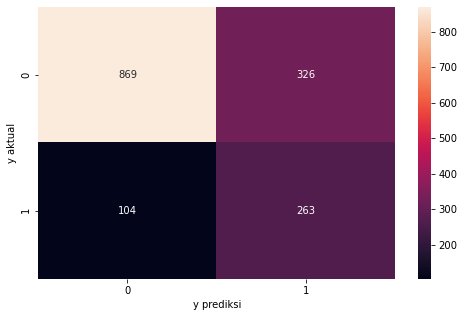

In [818]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='.0f', ax=ax)
plt.xlabel('y prediksi')
plt.ylabel('y aktual')
plt.show()

In [819]:
print(classification_report(y_test, y_spred))

              precision    recall  f1-score   support

           0       0.89      0.73      0.80      1195
           1       0.45      0.72      0.55       367

    accuracy                           0.72      1562
   macro avg       0.67      0.72      0.68      1562
weighted avg       0.79      0.72      0.74      1562



### Ketika kita pakai LOGIT+POLY+SMOTE, hasilnya jadi betambah dibandingkan LOGIT+SMOTE aja (69% --> 72%).
## Kesimpulan akhirnya, pada kasus ini, mo0del LOGIT+POLY+SMOTE merupakan yg paling bagus untuk memprediksi apakah seseorang akan exit atau engga